# **K-Means Clustering**

Clustering is the most well-known unsupervised learning technique. It finds structure in unlabeled data by identifying similar groups, or clusters. Examples of clustering applications are:

- Recommendation engines: group products to personalize the user experience
- Search engines: group news topics and search results
- Market segmentation: group customers based on geography, demography, and behaviors
- Image segmentation: medical imaging or road scene segmentation on self-driving cars
- Text clustering: group similar texts together based on word usage

The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. So two questions arise:

- How many groups do we choose?
- How do we define similarity?

k-means is the most popular and well-known clustering algorithm, and it tries to address these two questions.

- The “k” refers to the number of clusters (groups) we expect to find in a dataset.
- The “Means” refers to the average distance of data to each cluster center, also known as the centroid, which we are trying to minimize.

It is an iterative approach:
1. Place k random centroids for the initial clusters.
2. Assign data samples to the nearest centroid.
3. Calculate new centroids based on the above-assigned data samples.
4. Repeat Steps 2 and 3 until convergence.

Convergence occurs when points don’t move between clusters and centroids stabilize. This iterative process of updating clusters and centroids is called training. Once we are happy with our clusters, we can take a new unlabeled datapoint and quickly assign it to the appropriate cluster. This is called inference.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()


print(iris.keys())
print(iris.feature_names)
print(iris.data[0, :])
print(iris.target_names)
print(iris.target[0:3])
print(iris)
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[5.1 3.5 1.4 0.2]
['setosa' 'versicolor' 'virginica']
[0 0 0]
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 

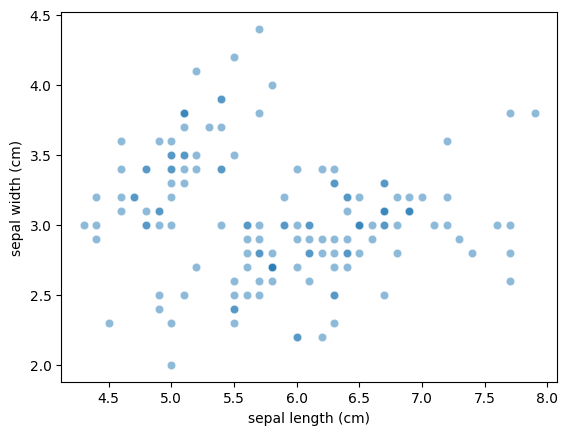

In [ ]:
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], alpha=0.5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

## **Algorithm**

### **Step 1: Place k random centroids**

After looking at the scatter plot and having a better understanding of the Iris data, let’s start implementing the k-means algorithm. Because we expect there to be three clusters (for the three species of flowers), let’s implement k-means where the k is 3. In real-life situations you won’t always know how many clusters to look for. We’ll learn more about how to choose k later.

Using the NumPy library, we will create three random initial centroids and plot them along with our samples.

[[7.76891405 3.14981513]
 [7.76916242 4.16917267]
 [7.13962439 3.23609027]]


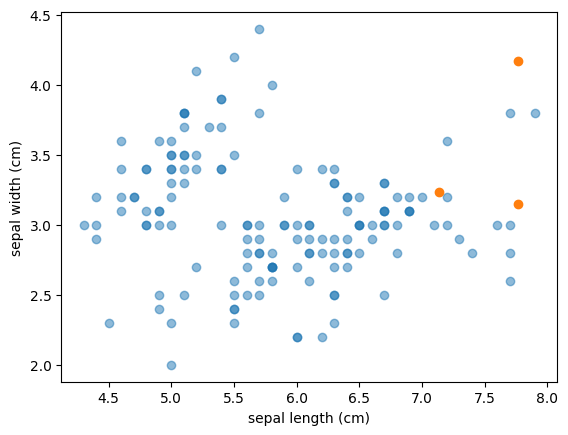

In [ ]:
x = iris.data[:, 0]
y = iris.data[:, 1]

sepal_length_width = np.array(list(zip(x, y)))

# Number of clusters
k = 3

# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), size=k)

# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), size=k)

# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))

print(centroids)

# Make a scatter plot of x, y
plt.scatter(x, y, alpha=0.5)

# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y)

# Display plot
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show()

### **Step 2: Assign data samples to the nearest centroid**

Now we have the three random centroids. Let’s assign data points to their nearest centroids.

To do this we’re going to use a distance formula to write a `distance()` function.

There are many different kinds of distance formulas. The one you’re probably most familiar with is called Euclidean distance. To find the Euclidean distance between two points on a 2-d plane, make a right triangle so that the hypotenuse connects the points. The distance between them is the length of the hypotenuse.

Another common distance formula is the taxicab distance. The taxicab distance between two points on a 2-d plane is the distance you would travel if you took the long way around the right triangle via the two shorter sides, just like a taxicab would have to do if it wanted to travel to the opposite corner of a city block.

Different distance formulas are useful in different situations.

After we write the `distance()` function, we are going to iterate through our data samples and compute the distance from each data point to each of the 3 centroids.

Suppose we have a point and a list of three distances in distances and it looks like [15, 20, 5], then we would want to assign the data point to the 3rd centroid. The `argmin(distances)` would return the index of the lowest corresponding distance, 2, because the index 2 contains the minimum value.

In [ ]:
def distance(a, b):
    one = (a[0] - b[0]) ** 2
    two = (a[1] - b[1]) ** 2
    distance = (one + two) ** 0.5
    return distance


# A function that assigns the nearest centroid to a sample


def assign_to_centroid(sample, centroids):
    k = len(centroids)
    distances = np.zeros(k)
    for i in range(k):
        distances[i] = distance(sample, centroids[i])
    closest_centroid = np.argmin(distances)
    return closest_centroid

In [ ]:
# Cluster labels for each point (either 0, 1, or 2)
labels = np.zeros(len(iris.data))

# Assign the nearest centroid to each sample
for i in range(len(iris.data)):
    labels[i] = assign_to_centroid(iris.data[i], centroids)

# Print labels
print(labels)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 0. 2.
 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


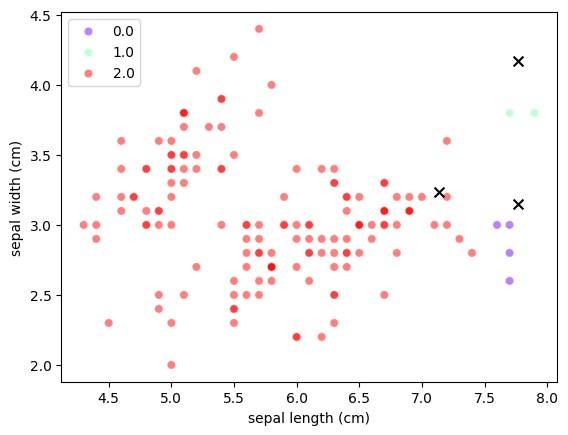

In [ ]:
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=labels, alpha=0.5, palette="rainbow")
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=50, marker="x")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

### **Step 3: Update centroids based on the above-assigned data samples**

Find new cluster centers by taking the average of the assigned points. To find the average of the assigned points, we can use the `.mean()` function.

In [ ]:
from copy import deepcopy

centroids_old = deepcopy(centroids)

for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

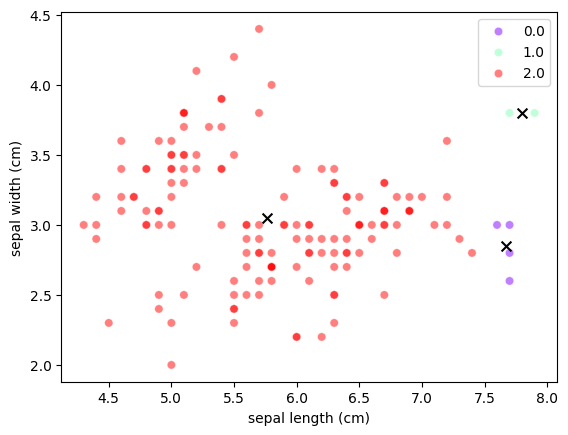

In [ ]:
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=labels, alpha=0.5, palette="rainbow")
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=50, marker="x")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

### **Step 4: Repeat Steps 2 and 3 until convergence.**

This is the part of the algorithm where we repeatedly execute Step 2 and 3 until the centroids stabilize (convergence). We can do this using a while loop. And everything from Step 2 and 3 goes inside the loop.

For the condition of the while loop, we need to create an array named `errors`. In each error index, we calculate the difference between the updated centroid (centroids) and the old centroid (centroids_old).

The loop ends when all three values in `errors` are 0.

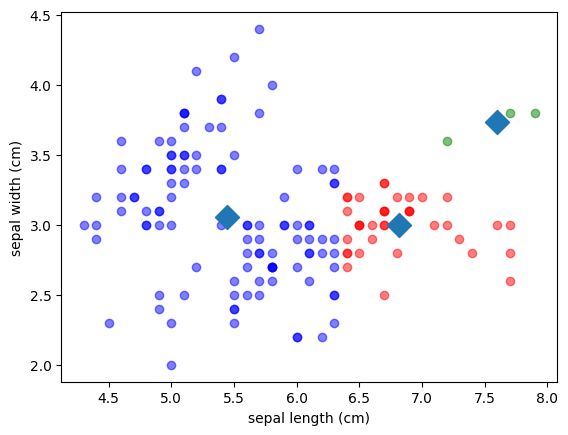

In [ ]:
distances = np.zeros(3)

# Initialize error:
error = np.zeros(3)

for i in range(k):
    error[i] = distance(centroids[i], centroids_old[i])

# Repeat Steps 2 and 3 until convergence:

while error.all() != 0:

    # Step 2: Assign samples to nearest centroid

    for i in range(len(iris.data)):
        labels[i] = assign_to_centroid(iris.data[i], centroids)

    # Step 3: Update centroids

    centroids_old = deepcopy(centroids)

    for i in range(k):
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
        error[i] = distance(centroids[i], centroids_old[i])

colors = ["r", "g", "b"]

for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(iris.data)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker="D", s=150)

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show()

## **sklearn.cluster.KMeans**

There are many advantages to using scikit-learn. It can run k-means on datasets with as many features as your computer can handle, so it will be easy for us to use all four features of the iris data set instead of the two features that we used in the previous exercises.


In [ ]:
from sklearn.cluster import KMeans

For Step 1, use the `KMeans()` method to build a model that finds k clusters. To specify the number of clusters (k), use the `n_clusters` keyword argument:

In [ ]:
model = KMeans(n_clusters=k)

For Steps 2 and 3, use the `.fit()` method to compute k-means clustering:

In [ ]:
model.fit(iris.data)

KMeans(n_clusters=3)

After k-means, we can now predict the closest cluster each sample in X belongs to. Use the `.predict()` method to compute cluster centers and predict cluster index for each sample:

In [ ]:
labels = model.predict(iris.data)

In [ ]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


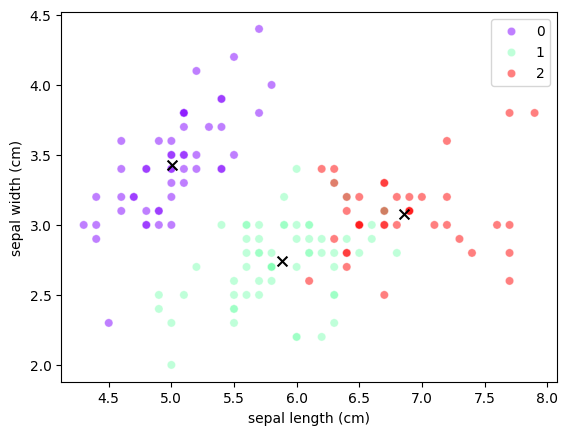

In [ ]:
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=labels, alpha=0.5, palette="rainbow")
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c="black", s=50, marker="x"
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

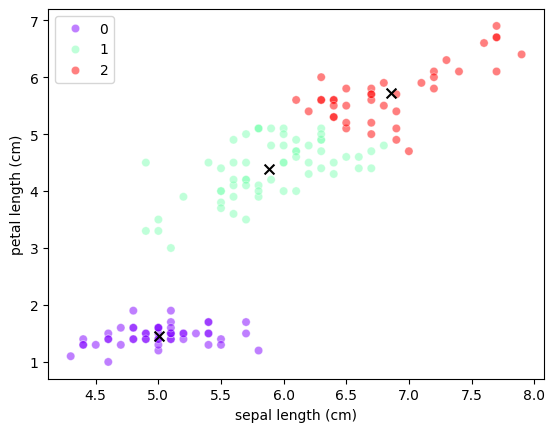

In [ ]:
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 2], hue=labels, alpha=0.5, palette="rainbow")
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 2], c="black", s=50, marker="x"
)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.show()

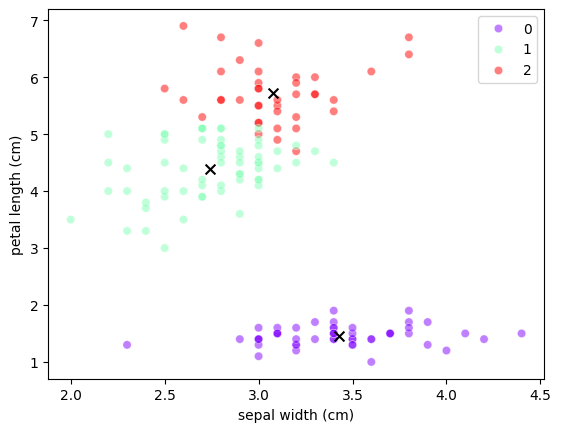

In [ ]:
sns.scatterplot(x=iris.data[:, 1], y=iris.data[:, 2], hue=labels, alpha=0.5, palette="rainbow")
plt.scatter(
    model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], c="black", s=50, marker="x"
)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

## **Inertia**

At this point, we have grouped the Iris plants into 3 clusters. But suppose we didn’t know there are three species of Iris in the dataset, what is the best number of clusters? And how do we determine that?

Before we answer that, we need to define what is a good cluster?

Good clustering results in tight clusters, meaning that the samples in each cluster are bunched together. How spread out the clusters are is measured by inertia. Inertia is the distance from each sample to the centroid of its cluster. The lower the inertia is, the better our model has done. You can check the inertia of a model by:

In [ ]:
model.inertia_

78.8556658259773

For the Iris dataset, if we graph all the `k`'s (number of clusters) with their inertias:

![image](images/inertia_vs_k.png)

Ultimately, this will always be a trade-off. If the inertia is too large, then the clusters probably aren’t clumped close together. On the other hand, if there are too many clusters, the individual clusters might not be different enough from each other. The goal is to have low inertia and a small number of clusters.

One of the ways to interpret this graph is to use the elbow method: choose an “elbow” in the inertia plot - when inertia begins to decrease more slowly.